## Alexnet

In [1]:
import tensorflow as tf

In [79]:
input_=tf.keras.Input((227,227,3))

x=tf.keras.layers.Conv2D(96,11,4)(input_)
x=tf.keras.layers.MaxPool2D(3,2)(x)

x=tf.keras.layers.Conv2D(256,5, padding='same', activation='relu')(x)
x=tf.keras.layers.MaxPool2D(3,2)(x)

x=tf.keras.layers.Conv2D(384, 3, padding='same', activation='relu', bias_initializer='ones')(x)
x=tf.keras.layers.Conv2D(384, 3, padding='same', activation='relu')(x)
x=tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x=tf.keras.layers.MaxPool2D(3,2)(x)

x=tf.keras.layers.Flatten()(x)

x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.Dense(1000, activation='softmax')(x)

In [77]:
import tensorflow_addons as tfa

In [80]:
model=tf.keras.Model(input_, x)

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer=tfa.optimizers.SGDW(weight_decay=0.0005, momentum=0.9))

model.weights[1]

<tf.Variable 'conv2d_149/bias:0' shape=(96,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [81]:
model.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 227, 227, 3)]     0         
                                                                 
 conv2d_149 (Conv2D)         (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_150 (Conv2D)         (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 13, 13, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_151 (Conv2D)         (None, 13, 13, 384)       885

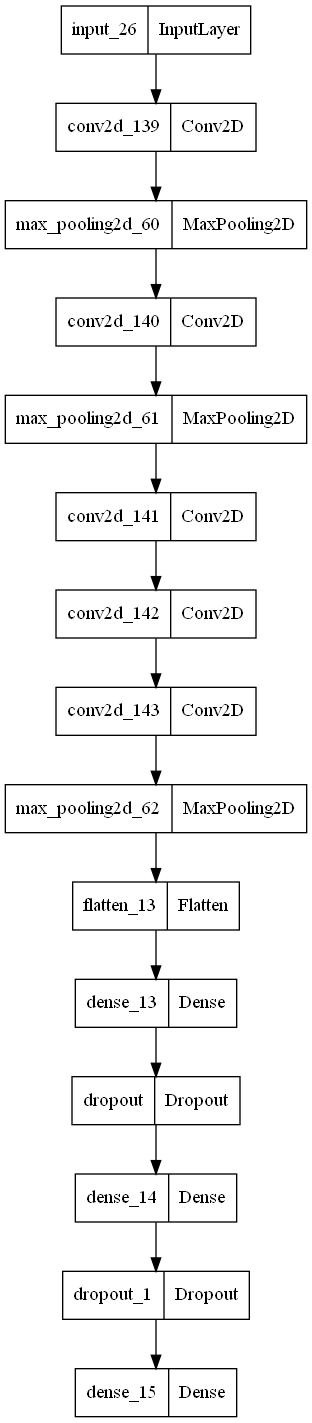

In [76]:
tf.keras.utils.plot_model(model)

## Alexnet (메모리부족으로 인한 모델 쪼개기(논문상))

In [67]:
x = tf.keras.layers.Conv2D(48, 11, 4)(input_)
x = tf.keras.layers.MaxPool2D(3,2)(x)
xx = tf.keras.layers.Conv2D(128, 5, padding='same')(x)

y = tf.keras.layers.Conv2D(48, 11, 4)(input_)
y = tf.keras.layers.MaxPool2D(3,2)(y)
yy = tf.keras.layers.Conv2D(128, 5, padding='same')(y)

i = tf.keras.layers.Concatenate()([xx,yy])
i = tf.keras.layers.Conv2D(192, 3, padding='same')(i)
i = tf.keras.layers.Conv2D(192, 3, padding='same')(i)
i = tf.keras.layers.Conv2D(128, 3, padding='same')(i)
i = tf.keras.layers.MaxPool2D(3,2)(i)
i = tf.keras.layers.Flatten()(i)

j = tf.keras.layers.Concatenate()([xx,yy])
j = tf.keras.layers.Conv2D(192, 3, padding='same')(j)
j = tf.keras.layers.Conv2D(192, 3, padding='same')(j)
j = tf.keras.layers.Conv2D(128, 3, padding='same')(j)
j = tf.keras.layers.MaxPool2D(3,2)(j)
j = tf.keras.layers.Flatten()(j)

k = tf.keras.layers.Concatenate()([i,j])
k = tf.keras.layers.Dense(2048)(k)

l = tf.keras.layers.Concatenate()([i,j])
l = tf.keras.layers.Dense(2048)(l)

m = tf.keras.layers.Concatenate()([k,l])
m = tf.keras.layers.Dense(2048)(m)

n = tf.keras.layers.Concatenate()([k,l])
n = tf.keras.layers.Dense(2048)(n)

t = tf.keras.layers.Concatenate()([n,m])
t = tf.keras.layers.Dense(1000, activation='softmax')(t)

In [68]:
model2=tf.keras.Model(input_, t)
model2.summary()

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_25 (InputLayer)          [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_129 (Conv2D)            (None, 55, 55, 48)   17472       ['input_25[0][0]']               
                                                                                                  
 conv2d_131 (Conv2D)            (None, 55, 55, 48)   17472       ['input_25[0][0]']               
                                                                                                  
 max_pooling2d_56 (MaxPooling2D  (None, 27, 27, 48)  0           ['conv2d_129[0][0]']      

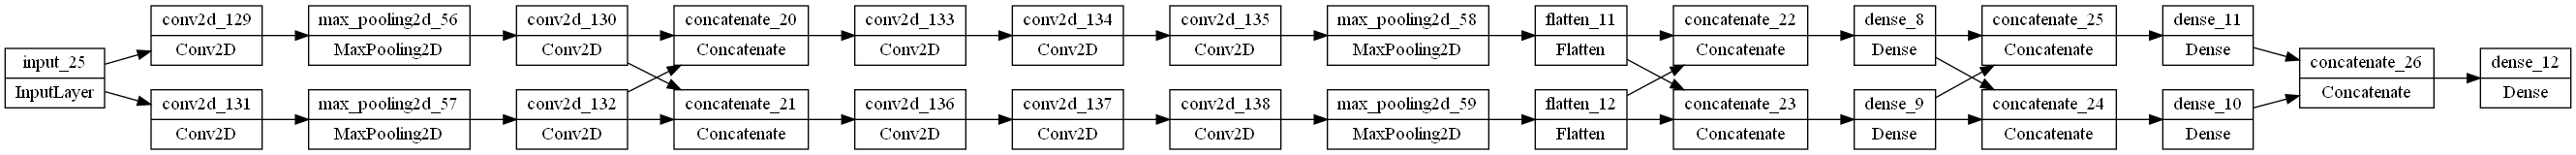

In [69]:
tf.keras.utils.plot_model(model2, rankdir='LR')

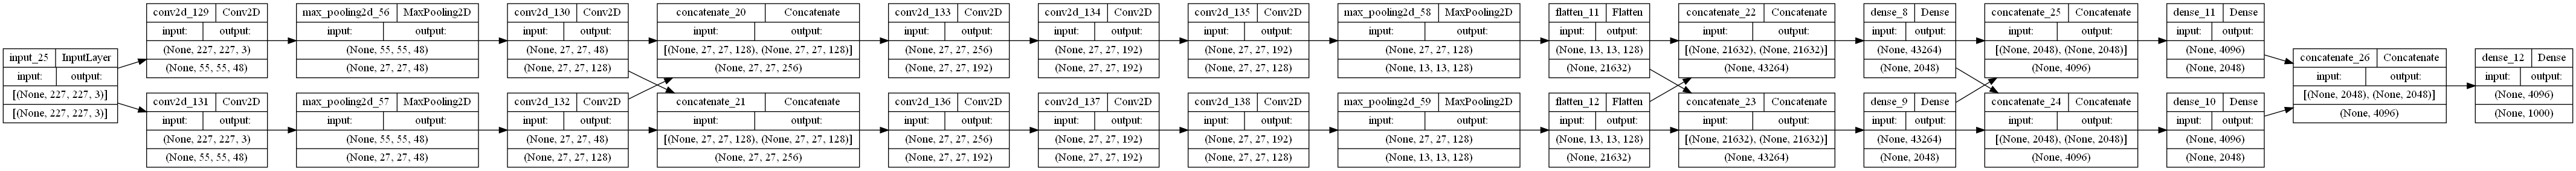

In [70]:
tf.keras.utils.plot_model(model2, rankdir='LR', show_shapes=True)

## 7/26화

In [4]:
import tensorflow as tf

In [5]:
a=tf.range(24, dtype=tf.float32)
a=tf.reshape(a, (1,4,6,1))

In [6]:
a.shape

TensorShape([1, 4, 6, 1])

In [7]:
b=tf.keras.layers.Conv2D(2,1)
b(a)

<tf.Tensor: shape=(1, 4, 6, 2), dtype=float32, numpy=
array([[[[  0.        ,   0.        ],
         [  0.11007345,  -1.0246314 ],
         [  0.2201469 ,  -2.0492628 ],
         [  0.33022034,  -3.073894  ],
         [  0.4402938 ,  -4.0985255 ],
         [  0.55036724,  -5.123157  ]],

        [[  0.6604407 ,  -6.147788  ],
         [  0.77051413,  -7.1724195 ],
         [  0.8805876 ,  -8.197051  ],
         [  0.990661  ,  -9.221683  ],
         [  1.1007345 , -10.246314  ],
         [  1.2108079 , -11.270946  ]],

        [[  1.3208814 , -12.295576  ],
         [  1.4309548 , -13.320208  ],
         [  1.5410283 , -14.344839  ],
         [  1.6511017 , -15.369471  ],
         [  1.7611752 , -16.394102  ],
         [  1.8712486 , -17.418734  ]],

        [[  1.981322  , -18.443365  ],
         [  2.0913954 , -19.467997  ],
         [  2.201469  , -20.492628  ],
         [  2.3115425 , -21.51726   ],
         [  2.4216158 , -22.541891  ],
         [  2.5316892 , -23.566523  ]]]], d

In [8]:
b=tf.keras.layers.Conv2D(10,1)
b(a)

<tf.Tensor: shape=(1, 4, 6, 10), dtype=float32, numpy=
array([[[[  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ],
         [  0.18635315,  -0.47622123,   0.22040111,  -0.5777054 ,
            0.53489655,   0.17739648,   0.23478466,  -0.5363771 ,
           -0.12225002,   0.23441368],
         [  0.3727063 ,  -0.95244247,   0.44080222,  -1.1554108 ,
            1.0697931 ,   0.35479295,   0.46956933,  -1.0727541 ,
           -0.24450004,   0.46882737],
         [  0.55905944,  -1.4286637 ,   0.6612033 ,  -1.7331161 ,
            1.6046896 ,   0.5321894 ,   0.704354  ,  -1.6091312 ,
           -0.36675006,   0.70324105],
         [  0.7454126 ,  -1.9048849 ,   0.88160443,  -2.3108215 ,
            2.1395862 ,   0.7095859 ,   0.93913865,  -2.1455083 ,
           -0.48900008,   0.93765473],
         [  0.93176574,  -2.3811061 ,   1.1020055 ,  -2.888527  ,
            2.6744828 , 

shape가 바뀌는 것을 볼 수 있음

In [9]:
a=tf.range(72, dtype=tf.float32)
a=tf.reshape(a, (1,4,6,3))
b=tf.keras.layers.Conv2D(3,1)
b(a)

<tf.Tensor: shape=(1, 4, 6, 3), dtype=float32, numpy=
array([[[[ -0.77877617,   1.817703  ,   1.2227771 ],
         [ -0.86596227,   5.175005  ,   6.581376  ],
         [ -0.95314837,   8.532307  ,  11.939975  ],
         [ -1.0403342 ,  11.889607  ,  17.298573  ],
         [ -1.1275206 ,  15.24691   ,  22.657171  ],
         [ -1.2147069 ,  18.604212  ,  28.015772  ]],

        [[ -1.3018932 ,  21.961514  ,  33.374367  ],
         [ -1.3890786 ,  25.318815  ,  38.732967  ],
         [ -1.476265  ,  28.676117  ,  44.091564  ],
         [ -1.5634513 ,  32.03342   ,  49.45017   ],
         [ -1.6506367 ,  35.39072   ,  54.808765  ],
         [ -1.737822  ,  38.74802   ,  60.16736   ]],

        [[ -1.8250093 ,  42.105324  ,  65.525955  ],
         [ -1.9121966 ,  45.462624  ,  70.88456   ],
         [ -1.9993801 ,  48.819927  ,  76.24316   ],
         [ -2.0865674 ,  52.17723   ,  81.60175   ],
         [ -2.1737547 ,  55.53453   ,  86.96036   ],
         [ -2.26094   ,  58.89183   ,  92

차원을 똑같이 만들면 의미가 없는 것 아닌가? non linearity를 줄 수 있음

In [10]:
b.weights

[<tf.Variable 'conv2d_2/kernel:0' shape=(1, 1, 3, 3) dtype=float32, numpy=
 array([[[[ 0.2080276 , -0.24163628,  0.9290719 ],
          [ 0.3045969 ,  0.9037707 ,  0.4914782 ],
          [-0.54168653,  0.45696616,  0.36564946]]]], dtype=float32)>,
 <tf.Variable 'conv2d_2/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [11]:
input_=tf.keras.Input((227,227,3))
x=tf.keras.layers.Conv2D(96,11,4)(input_)
x=tf.keras.layers.MaxPool2D(3,2)(x)
x=tf.keras.layers.Conv2D(256,5, padding='same', activation='relu')(x)
x=tf.keras.layers.MaxPool2D(3,2)(x)
x=tf.keras.layers.Conv2D(384, 3, padding='same', activation='relu', bias_initializer='ones')(x)
x=tf.keras.layers.Conv2D(384, 3, padding='same', activation='relu')(x)
x=tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x=tf.keras.layers.MaxPool2D(3,2)(x)

x=tf.keras.layers.GlobalAveragePooling2D()(x)

#x=tf.keras.layers.Flatten()(x)

# x=tf.keras.layers.Dense(4096, activation='relu')(x)
# x=tf.keras.layers.Dropout(0.5)(x)
# x=tf.keras.layers.Dense(4096, activation='relu')(x)
# x=tf.keras.layers.Dropout(0.5)(x)
# x=tf.keras.layers.Dense(1000, activation='softmax')(x)

In [32]:
model=tf.keras.Model(input_, x)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d_27 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 13, 13, 384)       8851

- flatten한 경우에는 6x6가 256개를 flatten하므로 parameter 개수는 다 곱한 만큼인 9216개

- global average pooling한 경우에는 6x6x256이 256이 됨

항상 어느 것이 더 좋다라고 말할 순 없음

## 7/27수

2012: AlexNet

2013: ZFNet (visualization) / 1x1, stacking, GAP(global average pooling)

2014: VGG / GoogLeNet / VGG는 2~3주, GPU를 적극적으로 사용했는데 GPU와 CPU를 같이 사용하는 기법 등장

1. numpy tensorflow를 사용하면 tf.data.Dataset 형태로 데이터를 만든다(cpu와 gpu를 적절히 사용해서, 학습할 때 하드웨어 성능을 최대한 끌어냄)
2. abc 추상클래스
3. map.filter와 reduce 함수형기법으로 데이터처리한다

In [45]:
import tensorflow as tf

In [15]:
type(tf.data.Dataset)

abc.ABCMeta

abstract class(추상클래스)

In [42]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [17]:
X_train.shape

(60000, 28, 28)

## 1)

In [47]:
tf.data.Dataset.from_tensor_slices(X_train)

<TensorSliceDataset element_spec=TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None)>

슬라이스 하니까 (28, 28)이 나옴, 데이터를 (28, 28) 형태로 쪼개서 관리함, 학습할 때는 60000보다 (28,28) 부분이 중심이기 때문에 tensor slices를 더 자주 사용함

In [20]:
tf.data.Dataset.from_tensors(X_train)

<TensorDataset element_spec=TensorSpec(shape=(60000, 28, 28), dtype=tf.uint8, name=None)>

위는 tensor slice dataset이고 이건 tensor dataset임, 가장 기본적인 데이터셋을 만듦, 둘은 이름이 다르고 각각의 특징을 갖지만, 똑같은 규칙을 따름

In [22]:
tf.data.Dataset.from_tensor_slices(X_train).batch(32)

<BatchDataset element_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.uint8, name=None)>

In [21]:
tf.data.Dataset.from_tensors(X_train).batch(32)

<BatchDataset element_spec=TensorSpec(shape=(None, 60000, 28, 28), dtype=tf.uint8, name=None)>

None은 몇 개 들어올지 모르겠지만 batch 활용할 수 있게

## 2)

In [23]:
tf.data.Dataset.from_tensor_slices((X_train,y_train))

<TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

- 묶어서 만들 수도 있다
- 여기서 TensorSpec은 기본적으로 shape과 dtype을 말함, 추가적으로 name까지, array에서도 shape과 type은 중요했음

In [24]:
tf.data.DatasetSpec

tensorflow.python.data.ops.dataset_ops.DatasetSpec

## 3)

In [37]:
input_ =tf.keras.Input((28,28))
x=tf.keras.layers.Flatten()(input_)
x=tf.keras.layers.Dense(10)(x)

model=tf.keras.Model(input_, x)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [36]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.4233
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.2504
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.1869
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.2041
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.1377


- 1875가 어떻게 나왔는가? X_train의 길이가 6만인데, tensorflow은 batch_size을 32로 기본설정함(fit의 툴팁을 보면 None으로 되어있지만)

- 지금까진 X_train과 y_train을 나눠서 학습했는데, 더이상 쪼갤 필요 없음, from_tensor_slices 써서 묶어서 쓸 수 있음

In [39]:
data=tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(32)

In [40]:
model.fit(data, batch_size=16, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 5.2120
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 5.1872
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 5.1313
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 5.0929
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.0795


- 왜 1875지? batch size를 16으로 설정했는데도?

- data에서 bacth(32)를 하면 fit 단계의 batch_size=16은 무효화됨


- batch dataset인 data가 들어오면 cpu와 gpu 사용을 확인하기 때문에 작은 데이터셋에서는 오히려 학습속도가 느려질 수 있음(위에서 X_train와 y_train을 써서 fit한 모델 결과와 비교)

In [44]:
from sklearn.model_selection import train_test_split

학습에 들어가기 전에 데이터를 섞는 이유는 ***일반성***을 보장하기 위해서=> 따라서 suffle과 batch 기능 중요함(데이터가 몇개 들어가느냐에 따라 시간과 성능을 결정)

## prefetch

[참고](https://ahnjg.tistory.com/32)


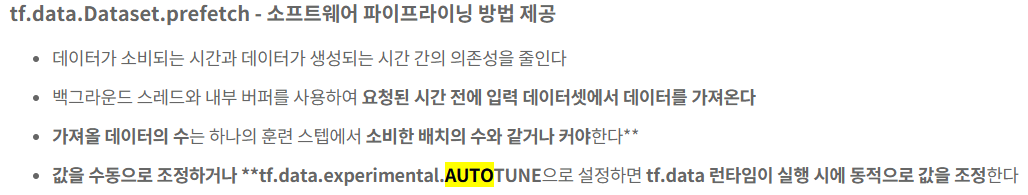


In [51]:
data=tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(32).prefetch(buffer_size=100)

model.fit(data, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.0977
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.0534
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.0706
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.1160
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.1303
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.1530
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.1140
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.1376
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.1505
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.1630


suffle(buffer_size=1000)이면 1000개씩 준비시켜서 섞는다는 의미

In [52]:
data=tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

model.fit(data, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.1766
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.1941
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.1833
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.2426
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2476
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2687
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3053
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3264
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 5.3456
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 5.2978


튜닝을 상황에 따라 자동으로

In [53]:
data=tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE).cache()

model.fit(data, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3422
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4052
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4420
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 5.4231
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4120
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 5.5019
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4576
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4811
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5190
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5312


작은 데이터셋에 대해서는 cache()를 사용할 수 있음

## iter

In [55]:
x=tf.data.Dataset.from_tensors(X_train)

In [56]:
x[0]

TypeError: 'TensorDataset' object is not subscriptable

from_tensors나 from_tensor_slices나 dir에 \_\_getitem__이 없음=> 인덱스 접근 불가

스케쥴링을 하기 때문에, 메모리에 올라가기 전까지는 데이터를 볼 수 없음=> lazy 기법을 쓰려면 iterator

In [58]:
xx=iter(x)

In [59]:
next(xx)

<tf.Tensor: shape=(60000, 28, 28), dtype=uint8, numpy=
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0,

In [60]:
next(xx)

StopIteration: 

데이터를 한번에 다 보여주기 때문에 2번 이상 next 불가능

In [61]:
x=tf.data.Dataset.from_tensor_slices(X_train)

In [63]:
xx=iter(x)

In [72]:
next(xx)

<tf.Tensor: shape=(28, 28), dtype=uint8, numpy=
array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         63, 197,   0,   0,   0,   0,   0,   0,   0,  

tensor slices의 경우 next를 6만번 할 수 있음 (X_train의 길이가 6만이기 때문에

In [73]:
t=x.take(3)
for i in t: print(i)

tf.Tensor(
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253

## VGG [코드](https://lcyking.tistory.com/82)

32x32픽셀의 컬러이미지 6만개, 10개의 클래스로 라벨링

In [135]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

train_labels=tf.keras.utils.to_categorical(train_labels)
test_labels=tf.keras.utils.to_categorical(test_labels)

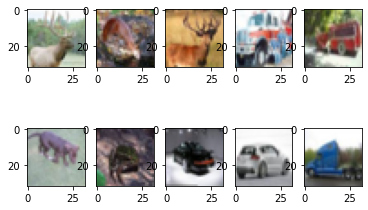

In [136]:
import numpy as np
import matplotlib.pyplot as plt

nums=np.random.randint(1,50000, size=10)

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_images[nums[i]])

In [137]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D

input_tensor=Input((224, 224, 3))
    
# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_tensor)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(units = 120, activation = 'relu')(x)
x = Dropout(0.5)(x)

output = Dense(units=10, activation = 'softmax')(x)
    
vgg= Model(inputs=input_tensor, outputs=output)
vgg.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

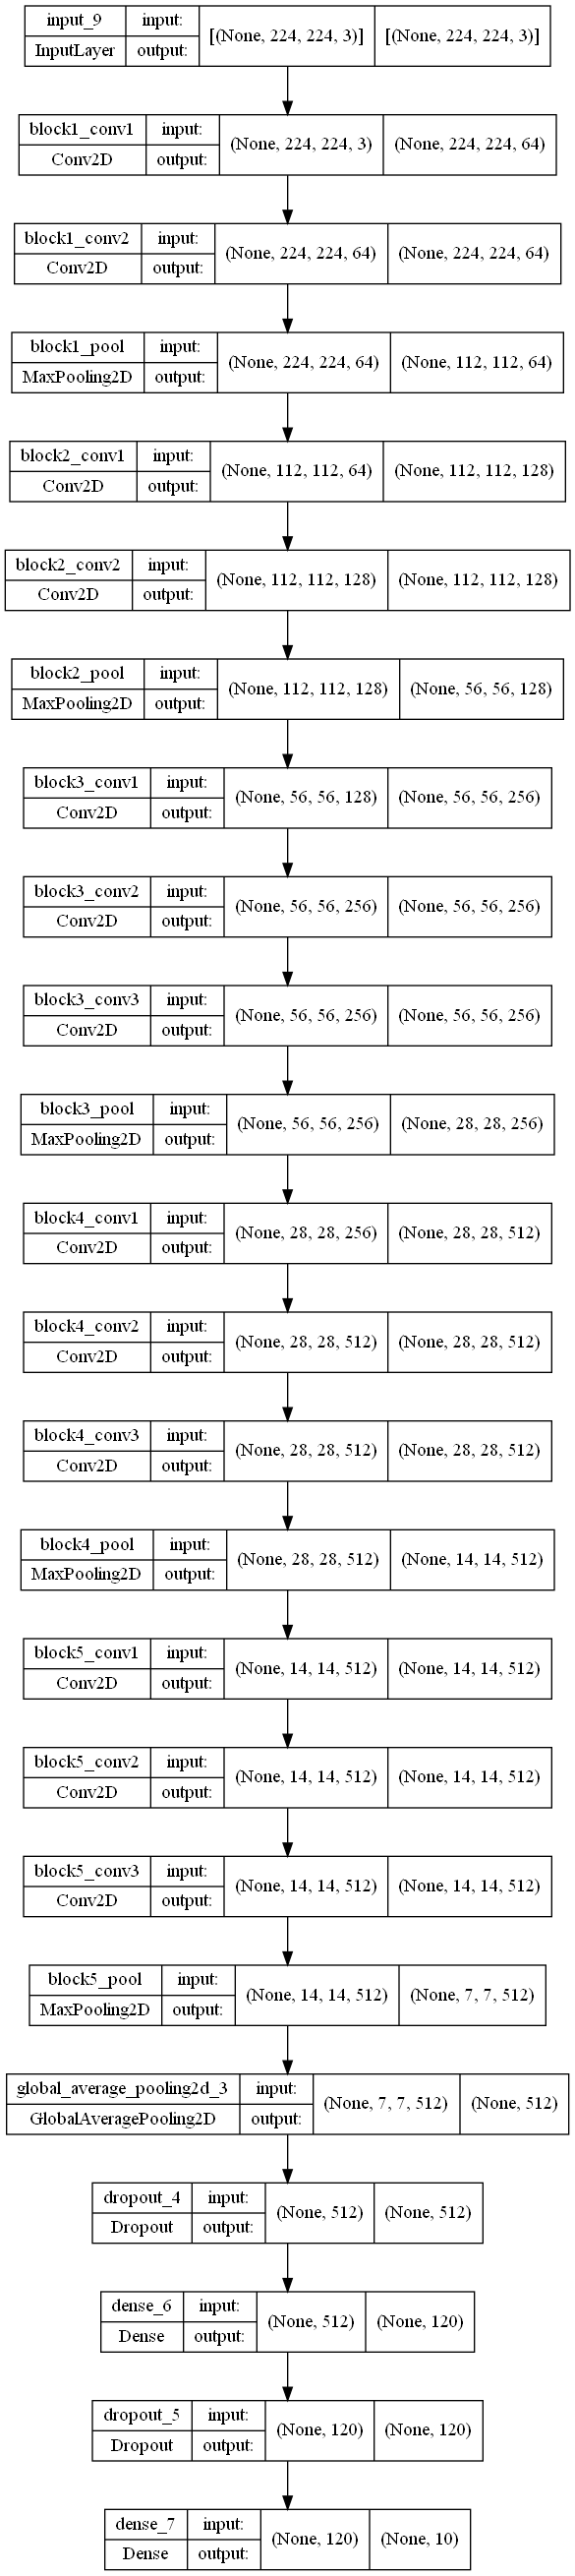

In [100]:
tf.keras.utils.plot_model(vgg, show_shapes=True)

rankdir는 디폴트가 top bottom(TB)이고, left right(LR)로 설정할 수 있음

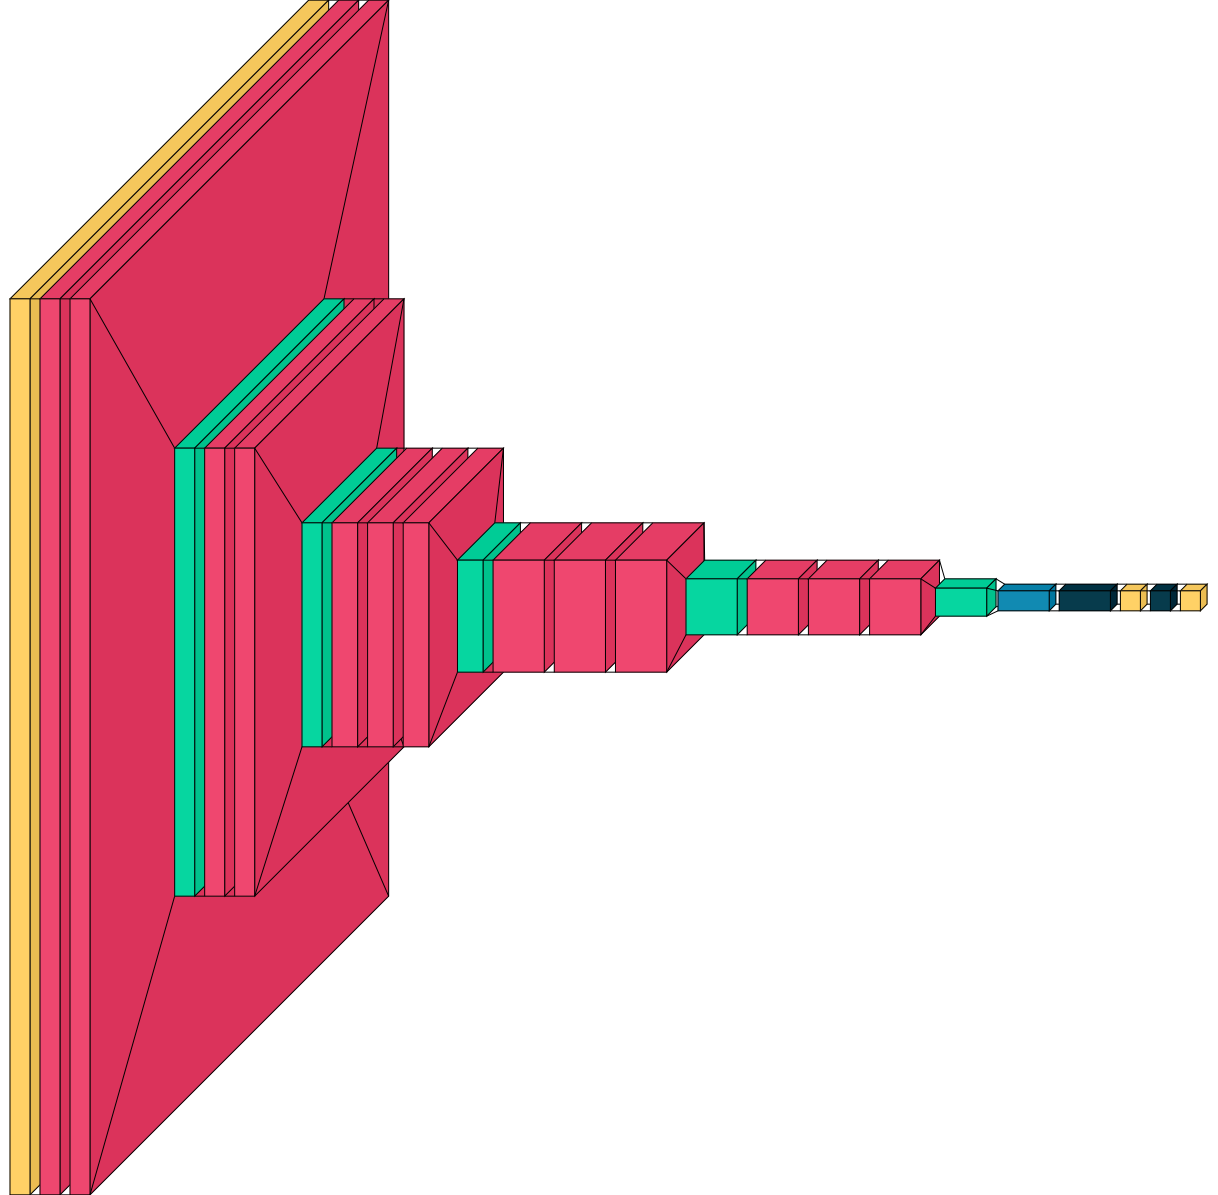

In [94]:
import visualkeras
visualkeras.layered_view(vgg)

## 모델 2개 비교 (1x1과 3x3의 순서 차이)

In [110]:
input_ =Input((224,224,3))
x=tf.keras.layers.Conv2D(64,3)(input_)
x=tf.keras.layers.Conv2D(32,1)(x)
x=tf.keras.layers.Conv2D(32,3)(x)

model1=tf.keras.Model(input_, x)

In [111]:
input_ =Input((224,224,3))
y=tf.keras.layers.Conv2D(64,3)(input_)
y=tf.keras.layers.Conv2D(32,3)(y)
y=tf.keras.layers.Conv2D(32,1)(y)

model2=tf.keras.Model(input_, y)

In [112]:
model1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_11 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      2080      
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
Total params: 13,120
Trainable params: 13,120
Non-trainable params: 0
_________________________________________________________________


In [113]:
model2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 conv2d_15 (Conv2D)          (None, 220, 220, 32)      18464     
                                                                 
 conv2d_16 (Conv2D)          (None, 220, 220, 32)      1056      
                                                                 
Total params: 21,312
Trainable params: 21,312
Non-trainable params: 0
_________________________________________________________________


모델1의 parameter 개수는 13000여개인데, 모델2는 21000여개임

=> 모델1에서 1x1 컨볼루션을 먼저 쓰더라

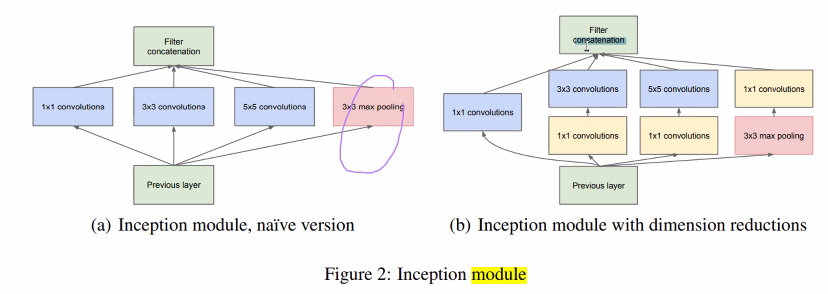

=> GoogLeNet은 inception module을 통해, AlexNet보다 연산량이 1/12만큼 줄었지만 성능은 15퍼센트 이상 좋아졌다

## Rethinking

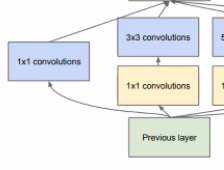 일단 이 부분 구현해보면

In [164]:
import tensorflow as tf

input_=tf.keras.Input((224,224,4))

x=tf.keras.layers.Conv2D(128, 3)(input_)
x1=tf.keras.layers.Conv2D(64, 1)(x)

x1=tf.keras.layers.Conv2D(32,1)(x) #dimension reduction
x3=tf.keras.layers.Conv2D(32,3)(x1)

In [149]:
tf.keras.layers.concatenate([x1,x3])

ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concatenation axis. Received: input_shape=[(None, 222, 222, 32), (None, 220, 220, 32)]

- concatenate에서 대문자는 객체지행형, 소문자는 함수형 테크닉 (tf.keras.losses 할 때 배웠음)
- 소문자를 쓰니까 대문자의 error message를 줌, 내부적으론 다름
- 함수형을 쓰니까 객체형으로 바꿔줌(---> 968 return Concatenate 라인)

### concatenate를 살펴보면...

In [159]:
import numpy as np

x=np.arange(24).reshape(4,6)
y=np.arange(36).reshape(6,6)

In [158]:
np.concatenate((x,y)) #axis=0으로 concatenate할 수 있음

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [160]:
x=np.arange(24).reshape(6,4)
y=np.arange(36).reshape(6,6)

In [161]:
np.concatenate((x,y), axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3,  4,  5],
       [ 4,  5,  6,  7,  6,  7,  8,  9, 10, 11],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [12, 13, 14, 15, 18, 19, 20, 21, 22, 23],
       [16, 17, 18, 19, 24, 25, 26, 27, 28, 29],
       [20, 21, 22, 23, 30, 31, 32, 33, 34, 35]])

### 다시 코드로 돌아와서...

In [184]:
import tensorflow as tf

input_=tf.keras.Input((224,224,4))

x=tf.keras.layers.Conv2D(128, 3)(input_)
x1=tf.keras.layers.Conv2D(64, 1, padding='same')(x)

#case1
x1=tf.keras.layers.Conv2D(32,1)(x)
x3=tf.keras.layers.Conv2D(32,3)(x1)
print(x1.shape, x3.shape)

#case2
x1=tf.keras.layers.Conv2D(32,1)(x)
x3=tf.keras.layers.Conv2D(32,3, padding='same')(x1)
print(x1.shape, x3.shape)

(None, 222, 222, 32) (None, 220, 220, 32)
(None, 222, 222, 32) (None, 222, 222, 32)


In [189]:
tf.keras.layers.concatenate([x1,x3], axis=3)

<KerasTensor: shape=(None, 222, 222, 64) dtype=float32 (created by layer 'concatenate_16')>

- axis 지정해줌 (default가 -1이기 때문에 여기선 생략해도 됨)
- padding='same'을 하면 zero padding을 할 때, 크기를 앞에 들어온 것과 똑같게 자동으로 맞춰줌

In [204]:
import tensorflow as tf

input_=tf.keras.Input((224,224,4))

x=tf.keras.layers.Conv2D(128, 3)(input_)

x1x1=tf.keras.layers.Conv2D(64, 1, padding='same')(x)

x1x1dr=tf.keras.layers.Conv2D(32,1)(x)
x3x3=tf.keras.layers.Conv2D(32,3, padding='same')(x1x1dr)

x1x1dr2=tf.keras.layers.Conv2D(32,1)(x)
x5x5=tf.keras.layers.Conv2D(32,3, padding='same')(x1x1dr2)

mp=tf.keras.layers.MaxPool2D(3,1, padding='same')(x)
x1x1dr3=tf.keras.layers.Conv2D(32,1, padding='same')(mp)

x=tf.keras.layers.concatenate([x1x1,x3x3,x5x5, x1x1dr3])

In [205]:
model=tf.keras.Model(input_, x)

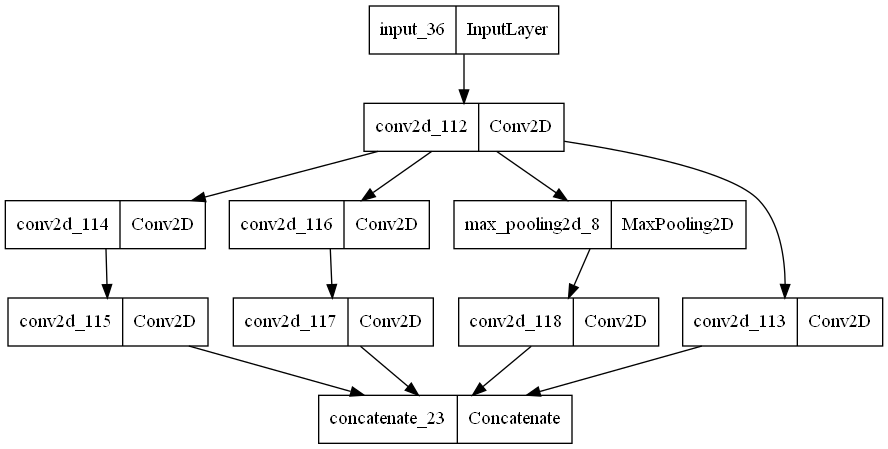

In [206]:
tf.keras.utils.plot_model(model)

## 7/28목

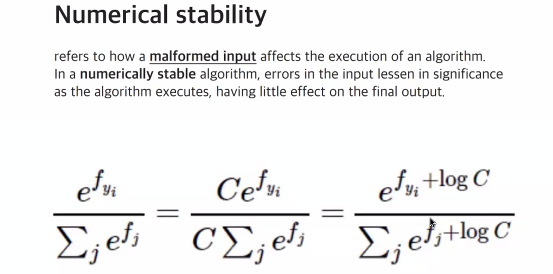

In [353]:
import tensorflow as tf

In [354]:
def softmax(logits):
    exp=tf.exp(logits)
    return exp/tf.reduce_sum(exp)

### 문제점

- \[1,2,3]을 넣으면 에러가 남-> float, bfloat16, half, double, complex64, complex128만 허용된다고 함
- 1000을 넣으면 nan이 떠버림-> 수치적 안정성이 떨어짐

In [360]:
softmax([1.,2.,3.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.09003057, 0.24472848, 0.66524094], dtype=float32)>

In [362]:
softmax([1000.,1])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([nan,  0.], dtype=float32)>

In [363]:
def softmax(logits):
    exp=tf.exp(logits- tf.reduce_max(logits))
    return exp/tf.reduce_sum(exp)

In [364]:
softmax([1000.,1])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 0.], dtype=float32)>

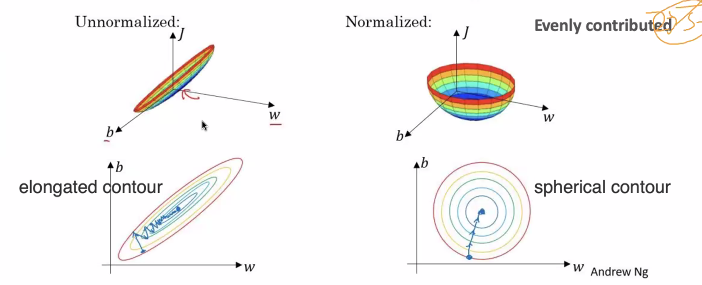


stability를 보장하기 위해선

- normalization: 거리기반 알고리즘에서 무조건 사용함, 아래의 예시를 보면 weight만 값의 범위과 편차가 아주 큼, 이런 경우 결과가 제대로 나오지 않음


왜 input data를 normalize해야 하는가?
1. normalization 하지 않은 것은 한쪽으로 길고 다른 한쪽으로 짧은 elongated 형태 때문에 계산의 일관성이 없어서 학습속도가 느려짐
2. normalization 함으로서 spherical contour 형태로 만드는 것임

minmax를 사용함으로써, mnist에선 train과 test image를 255.0로 나눠줌으로써 데이터를 정사각형 형태로 압축시켜주는 것

<AxesSubplot:>

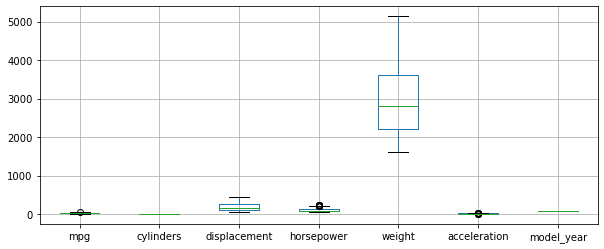

In [368]:
import seaborn as sns
mpg=sns.load_dataset('mpg')
mpg.boxplot(figsize=(10,4))

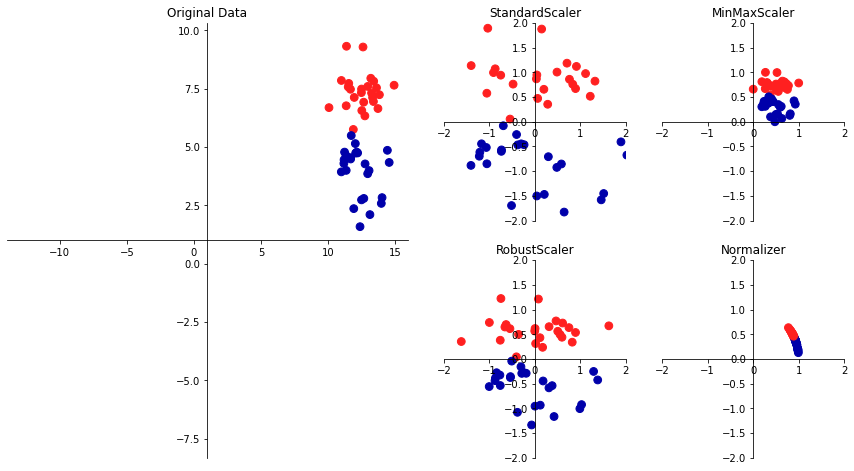

In [377]:
import mglearn
mglearn.plot_scaling.plot_scaling()

standard Scaler은 플러스 마이너스 값이 모두 나오기 때문에 연산에 자유로움이 있음, sigmoid는 플마값을 모두 가질 수 없기 때문에(결과가 항상 양수) 지그재그 문제가 있었음

maxpooling2D 이후 activation이 conv2D보다 먼저 나오는 기법을 pre-activation이라고 함, 왜 activation을 먼저 쓸 때 성능이 좋은가에 대한 정확한(합의된) 이론적 근거 없음